<a href="https://colab.research.google.com/github/shindechi/Netflix-Business-Case-Study/blob/main/Another_copy_of_Final_Netflix_case_study_Prachi_Shinde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Netflix Data Exploration Business Case**

## 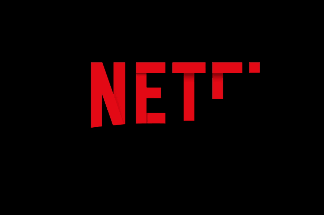



**Note: I have addressed only questions mentioned in the pdf named Netflix Data Exploration Business Case solution Approach**

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from wordcloud import WordCloud

### **Exploratory Data Analysis**


In [ ]:
# Loading the netflix data
# Assuming 'df' is your DataFrame

df = pd.read_csv("netflix.csv")

In [ ]:
# Get a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# `Insights`
The Netflix dataset comprises 12 columns, with 11 columns being categorical and only one column being numerical. While 6 columns showing null values.

In [ ]:
# Number of columns

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Check the shape of the DataFrame

df.shape

(8807, 12)

In [ ]:
# Check the dimensions of the DataFrame

df.ndim

2

# `Insights`
The Netflix dataset is 2 dimensional with 8807 enteries and 12 descriptions.

In [ ]:
# Display the first few rows of the DataFrame

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Overview of head and tail combined of the netflix dataframe

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Summary statistics for columns
df.describe(include ='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
# Summary statistics for numerical columns
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000



#`Insights`
1.The majority of content on Netflix consists of movies, with 6131 out of 8807 items falling into this category. The remaining 30% comprises TV series.

2.Rajiv Chilaka tops the director list with 19 credits, specializing in animated movies for children.

3.David Attenborough leads in actor appearances on Netflix, featuring in 19 films and shows.

4.The USA contributes the most content to Netflix, accounting for 35% of the total.

5.January 1, 2020, marks the peak date for content additions on Netflix, with 109 new shows and movies added.

6.Among the 17 different ratings on Netflix, "TV-MA" (Mature Audience Only) is the most common, covering nearly 36% of the platform's content with this rating.


In [ ]:
#Count unique values

df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### **Handling null values**

In [ ]:
#checking number of null values
print('\nColumns with missing value:')
df.isnull().sum()


Columns with missing value:


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Total null values
df.isnull().sum().sum()

4307

### **Adding missing values**

From our above analysis, there are total of `6 columns` containing missing values. `Director's` column has the most missing values followed by `cast` and `country` column. `Date added, ratings and duration` have significantly less missing values.


In [ ]:
#Add missing values

df['director'].fillna('Unknown Director',inplace=True)
df['cast'].fillna('Unknown cast',inplace = True)
df['country'].fillna('Unknown country',inplace = True)
df['date_added'].fillna('0',inplace= True)
df['rating'].fillna('0',inplace= True)
#df['year_added'].fillna('0',inplace= False)
#df['month_added'].fillna('0',inplace= False)
df['duration'].fillna('0',inplace= True)


*The director column has been updated to display 'Unknown Director', while the cast column now reflects 'Unknown Cast', and the country column shows 'Unknown Country'

*Whereas numerical columns like Date_added,rating,duration are replaced by 0.

In [ ]:
#Rechecking null values again
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

###**Adding new columns for better analysis**

In [ ]:
# converting date_added to datetime column
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')

#adding new columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added,Difference
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,38,18894.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,38,18893.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,38,18893.0


# **Un-nesting the columns**

Creating a new df which has un-nested director,cast and country columns into multiple rows for better analysis.

In [ ]:
#creating new table for storing unnested columns

df1 = copy.deepcopy(df)

df1["director"] = df["director"].str.split(", ")
df1["cast"] = df["cast"].str.split(", ")
df1["country"] = df["country"].str.split(", ")
df1["listed_in"] = df["listed_in"].str.split(", ")

df1 = df1.explode(['director'])
df1 = df1.explode(['cast'])
df1 = df1.explode(['country'])
df1 = df1.explode(['listed_in'])
df1.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added,Difference
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,38,18894.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,September,38,18893.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,September,38,18893.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,September,38,18893.0
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,September,38,18893.0


In [ ]:
df1


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,38
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,September,38
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,September,38
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,September,38
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,September,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0,March,9
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019.0,March,9
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019.0,March,9
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0,March,9


In [ ]:
df1.shape

(201991, 15)

### **Exploratory Analysis and Visualization**

1. Netflix Content By Type:

In [ ]:
#Distribution of content across the different types

print(f'Names of types:\n{df["type"].unique()}')
print('\n')
print(f'Counts of Types:\n{df["type"].value_counts()}')

Names of types:
['Movie' 'TV Show']


Counts of Types:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


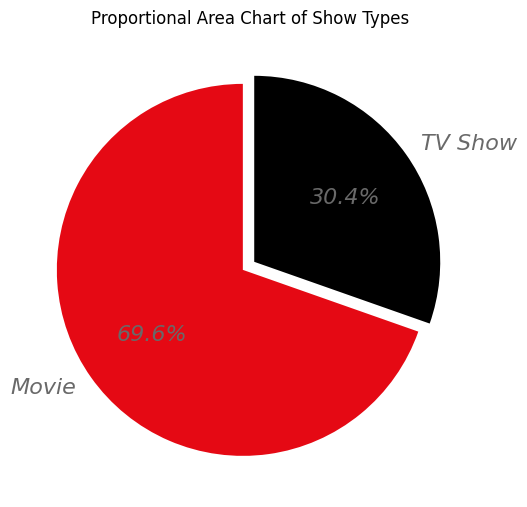

In [ ]:
#Distribution of content across the different types using pie chart

plt.figure(figsize=(6,7))
plt.title("Proportional Area Chart of Show Types")
plt.pie(df.type.value_counts(), explode=(0.050, 0.025), labels=df.type.value_counts().index,
        colors=['#e50914', 'Black'], autopct='%1.1f%%', textprops={'color': "dimgrey",'fontsize':"16", 'style':"oblique"}, startangle=90)
plt.show()

#`Insights`

It is observed that, around 70% content is Movies and around 30% content is TV shows.

# How has the number of movies/TV shows added on Netflix per year changed over the time?

In [ ]:
h= df.groupby(['year_added' ,'type' ])['show_id'].count().reset_index()
h.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)



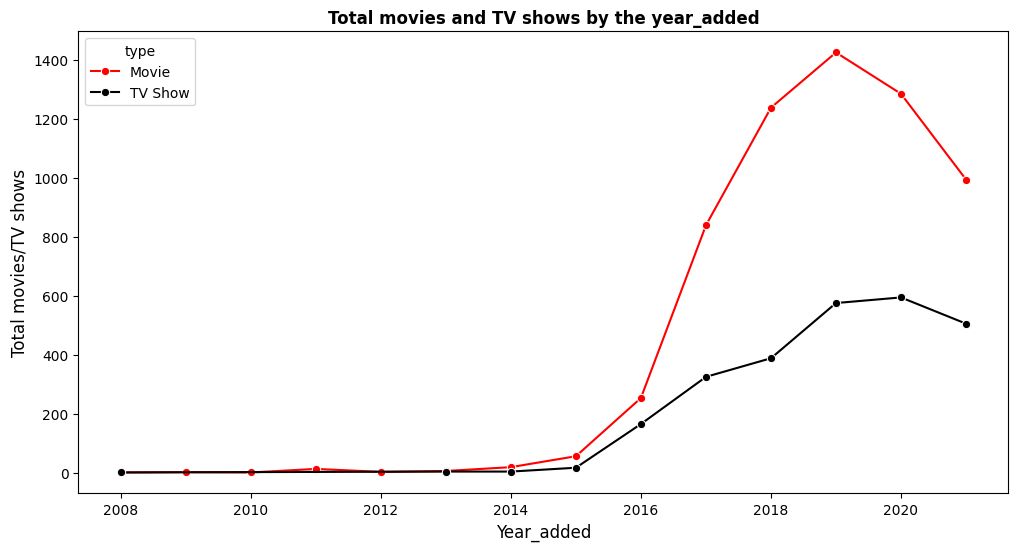

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = h , x = 'year_added' , y = 'total movies/TV shows' , hue = 'type', marker = 'o'  , ms = 6, palette=['red', 'black'])
plt.xlabel('Year_added' , fontsize = 12)
plt.ylabel('Total movies/TV shows' , fontsize = 12)
plt.title('Total movies and TV shows by the year_added' , fontsize = 12, weight = 'bold')
plt.show()

#`Insights`
*Netflix experienced a significant surge in content additions after 2015.

*The year 2019 witnessed the highest number of movies and TV shows added to Netflix.

*Content additions in 2020 and 2021 declined, likely due to the pandemic.

*However, the drop in TV show additions was less drastic compared to movies.



2.Netflix count of rating types:

In [ ]:
#Counts of Rating:
print(f'Names of Rating:\n{df["rating"].unique()}')
print('\n')
print(f'Counts of Rating:\n{df["rating"].value_counts()}')

Names of Rating:
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


Counts of Rating:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [ ]:
#Removed extra numbers
df['rating'].replace({'74 min':np.nan ,'84 min' : np.nan, '66 min' : np.nan},inplace = True)

In [ ]:
# Check Counts of Rating:
print(f'Names of Rating:\n{df["rating"].unique()}')
print('\n')
print(f'Counts of Rating:\n{df["rating"].value_counts()}')

Names of Rating:
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' nan 'NR' 'TV-Y7-FV' 'UR']


Counts of Rating:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


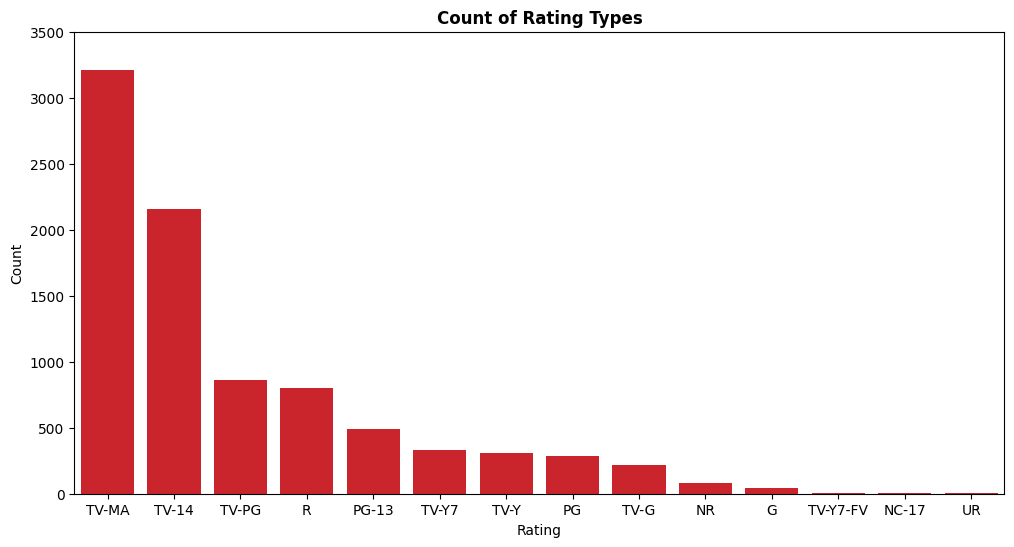

In [ ]:
#Count of rating types using countplot

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="rating", color="#e50914", order=df['rating'].value_counts().index)
plt.xticks(rotation=0)
plt.ylim(0,3500)
#plt.yticks(range(0, 3500, 150))
plt.title("Count of Rating Types",weight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


#`Insights`

TV-MA, TV-14, TV-PG are top 3 types of rating with highest count.

3.Names and count of genre

In [ ]:
#Names and count of genre

print(f'Names of Genre:\n{df1["listed_in"].nunique()}')
print('\n')
print(f'Counts of Genre:\n{df1["listed_in"].value_counts()}')     #Reminder: Analysis has been done in an unnested df therefore value_count is reflected to be high in number

Names of Genre:
42


Counts of Genre:
listed_in
Dramas                          29775
International Movies            28211
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Ko

#`Insights`

42 different genre are present in netflix. As the list extracted from unlisted it has higher count, hence didnt plot any graph.

4.Names and number of country

In [ ]:
#names of countrys
print(f'Names of Country:\n{df1["country"].nunique()}')
print('\n')
print(f'Counts of Country:\n{df["country"].value_counts()}')

Names of Country:
127


Counts of Country:
country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64


We see that many movies are produced in more than 1 country. Hence, the country column has comma separated values of countries.

This makes it difficult to analyse how many movies were produced in each country. We can use explode function in pandas to split the country column into different rows.

In [ ]:
country_tb = df.loc[:, ['show_id' , 'type' , 'country']]
country_tb.dropna(inplace = True)
country_tb['country'] = country_tb['country'].apply(lambda x : x.split(','))
country_tb = country_tb.explode('country')
country_tb

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
country_tb["country"].value_counts()

country
United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Ecuador             1
Iran                 1
Cyprus               1
 Mongolia            1
 Montenegro          1
Name: count, Length: 197, dtype: int64

5.Checking the unique values for columns


*   Type
*   Release year

*   Rating
*   Duration







In [ ]:
# checking the unique values for columns
for i in ['type','release_year','rating','duration']:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in type column are :-
['Movie' 'TV Show']
----------------------------------------------------------------------
Unique Values in release_year column are :-
[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]
----------------------------------------------------------------------
Unique Values in rating column are :-
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' nan 'NR' 'TV-Y7-FV' 'UR']
----------------------------------------------------------------------
Unique Values in duration column are :-
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '1

5.Checking the value_counts for columns


*   Type
*   Release year

*   Rating
*   Duration

In [ ]:
# checking the value_counts for columns
for i in ['type','release_year','rating','duration']:
    print('Value count in',i,'column are :-')
    print(df[i].value_counts())
    print('-'*70)

Value count in type column are :-
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in release_year column are :-
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64
----------------------------------------------------------------------
Value count in rating column are :-
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in duration column are :-
duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
          

# **Comparison of tv shows vs. movies.**



In [ ]:
#creating df for top 10 movies producing countries
df_movie = df1[df1['type'] == 'Movie']
df_movie = df_movie.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_movie = df_movie.drop(3)

#replacing country names in shortformat
df_movie['country'] = df_movie['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S Korea'})
df_movie

,country,title
0,USA,2751
1,India,962
2,UK,532
4,France,303
5,Germany,182
6,Spain,171
7,Japan,119
8,China,114
9,Mexico,111
10,Egypt,102


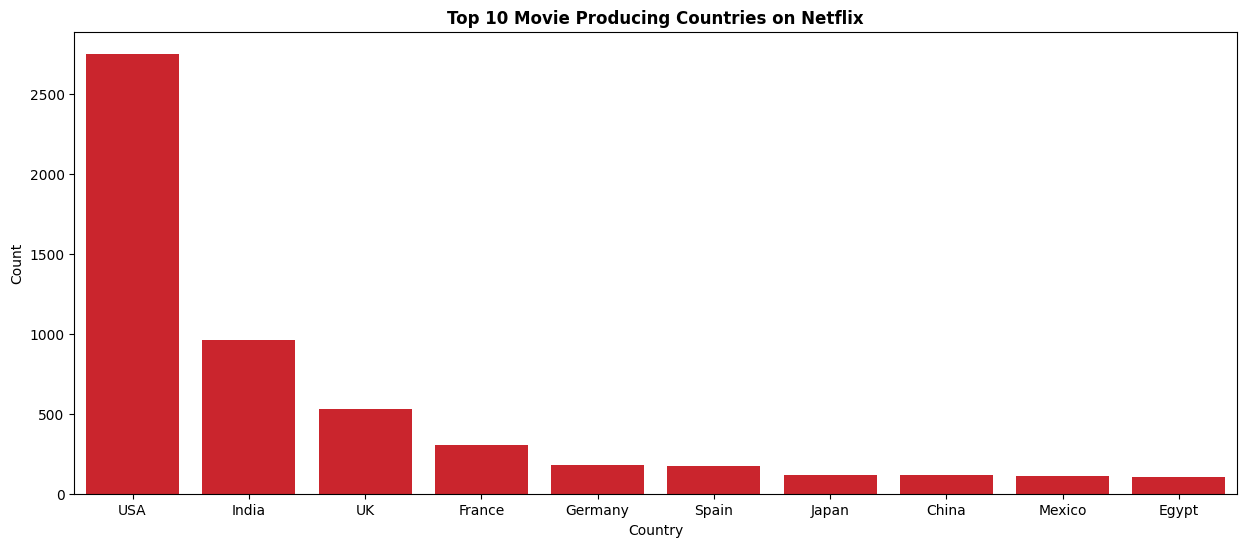

In [ ]:
#Number of Movies produced in Country
plt.figure(figsize=(15, 6))  # Set the figure size
sns.barplot(data=df_movie, x='country',y='title', color="#e50914")
plt.xticks(rotation=0)
plt.title("Top 10 Movie Producing Countries on Netflix",weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


#`Insights`
Above barplot reveals Number of Movies produced in Top 10 Countries, in which USA scores highest rank followed by India and UK.

In [ ]:
#creating df for top 10 tv shows producing countries
df_tv = df1[df1['type'] == 'TV Show']
df_tv = df_tv.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_tv = df_tv.drop(1)

#replacing country names in shortformat
df_tv['country'] = df_tv['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S Korea'})
df_tv

,country,title
0,USA,938
2,Japan,199
3,S Korea,170
4,Canada,126
5,France,90
6,India,84
7,Taiwan,70
8,Australia,66
9,Spain,61
10,Mexico,58


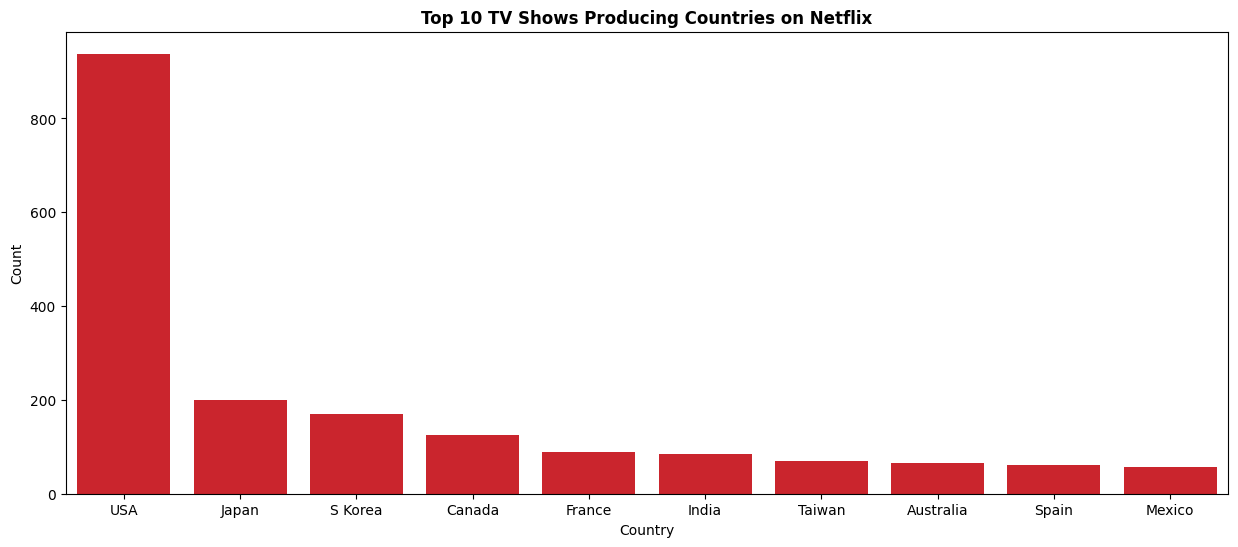

In [ ]:
#Number of TV Show produced in Country

plt.figure(figsize=(15, 6))  # Set the figure size
sns.barplot(data=df_tv, x='country',y='title', color="#e50914")
plt.xticks(rotation=0)
plt.title("Top 10 TV Shows Producing Countries on Netflix",weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


#`Insights`
Above barplot reveals Number of Tv Shows produced in Top 10 Countries, in which USA scores highest rank followed by Japan and S Korea.

Indian's prefer to watch movies over TV shows, on contrary South koreans perfer Tv shows over movies.

#What is the best time to launch a TV show?

Best week to release the Tv-show or the movie.

In [ ]:
week = df.groupby('week_added')['type'].value_counts()
week.name = 'count' # to avoid error while doing reset_index
week = week.reset_index()
week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week_added  106 non-null    UInt32
 1   type        106 non-null    object
 2   count       106 non-null    int64 
dtypes: UInt32(1), int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
#changing the week_added datatype to int

week['week_added'] = week['week_added'].astype('int64')

week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week_added  106 non-null    int64 
 1   type        106 non-null    object
 2   count       106 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [ ]:
# creating two different tables for movies and tv shows
week_movie = week.loc[week['type'] == 'Movie'].sort_values(by = 'week_added')
week_tv = week.loc[week['type'] == 'TV Show'].sort_values(by = 'week_added')


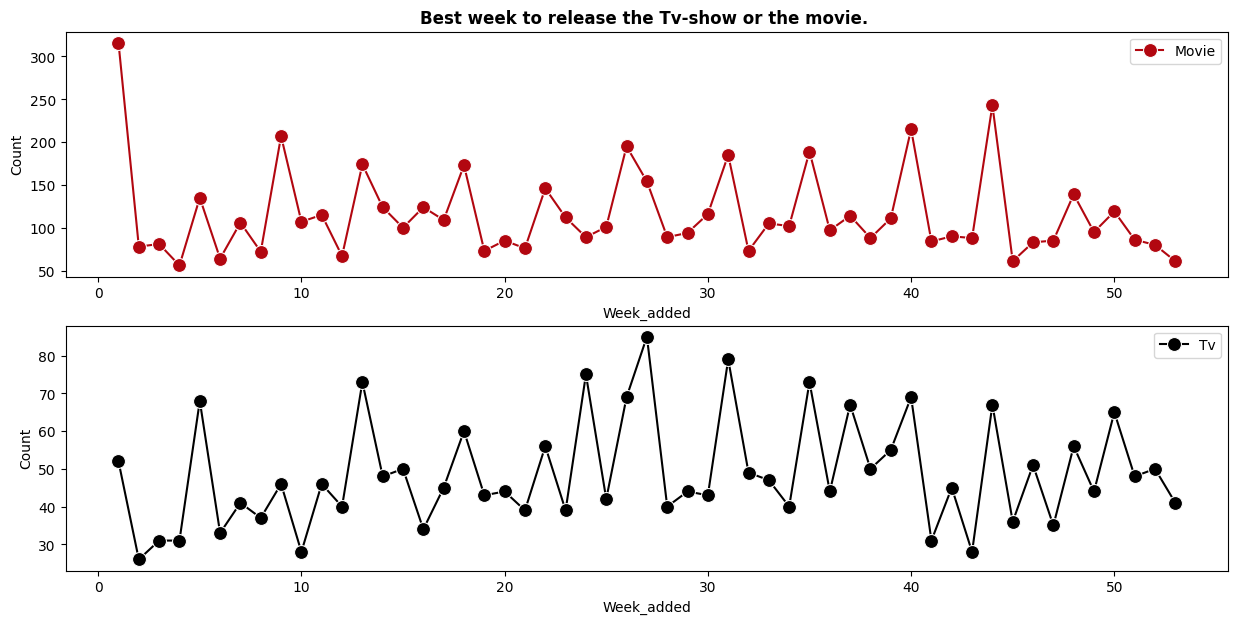

In [ ]:
fig = plt.figure(figsize=(15,7))
plt.subplot(2, 1, 1)
plt.title("Best week to release the Tv-show or the movie. ",weight='bold')
sns.lineplot(data = week_movie, x = 'week_added', y = 'count',marker = 'o',markersize = 10,color ='#b20710',
             label = 'Movie')
plt.xlabel('Week_added')
plt.ylabel('Count')
plt.subplot(2, 1, 2)
sns.lineplot(data = week_tv, x = 'week_added', y = 'count',marker = 'o',markersize = 10,color ='black',
             label = 'Tv')
plt.xlabel('Week_added')
plt.ylabel('Count')
plt.show()


#`Insights`
*The highest volume of movies are typically uploaded during the initial week of
the year.

*The highest volume of TV shows tends to be added in the 26th week (around June end)

 **Best Month to launch a TV show/Movie?**

In [ ]:
month = df.groupby('month_added')['type'].value_counts()
month.name = 'count' # to avoid error while doing reset_index
month = month.reset_index()

#converting month_added to categorical type to help in future sorting steps
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month['month_added'] = pd.Categorical(month['month_added'], categories=months, ordered=True)

month.head()

,month_added,type,count
0,April,Movie,550
1,April,TV Show,209
2,August,Movie,519
3,August,TV Show,230
4,December,Movie,547


In [ ]:
# creating two different tables for movies and tv shows
month_movie = month.loc[month['type'] == 'Movie'].sort_values(by = 'month_added')
month_tv = month.loc[month['type'] == 'TV Show'].sort_values(by = 'month_added')


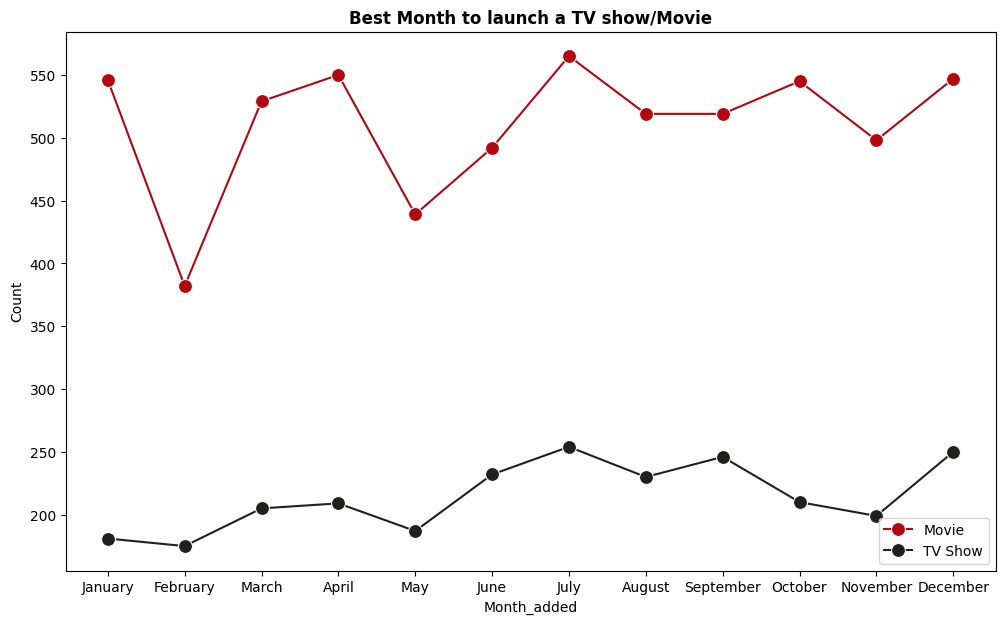

In [ ]:
#creating the plot
fig = plt.figure(figsize=(12,7))
sns.lineplot(data = month_movie, x = 'month_added', y = 'count',marker = 'o',markersize = 10,color ='#b20710',
             label = 'Movie')
sns.lineplot(data = month_tv, x = 'month_added', y = 'count',marker = 'o',markersize = 10,color ='#221f1f',
             label = 'TV Show')
plt.title("Best Month to launch a TV show/Movie",weight='bold')
plt.xlabel('Month_added')
plt.ylabel('Count')
plt.show()


#`Insights`
*There is a clear link between content uploads and holiday seasons, as evidenced by significant increases in content additions during January and December.

*Additionally, higher numbers of content uploads are observed in July, August, October, and December, while February, May, and November see relatively lower upload counts.

*The highest volume of movies are typically uploaded during the initial week of the year.

*The highest volume of TV shows tends to be added in the 26th week (around June end)

### **Analysis of actors/directors of different types of shows/movies.**

Top 10 directors who have appeared in most movies or TV shows.


In [ ]:
d_cnt = df1.groupby('director')['title'].nunique().sort_values(ascending  = False)[0:11].reset_index()
d_cnt

,director,title
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Youssef Chahine,12
8,Jay Chapman,12
9,Martin Scorsese,12


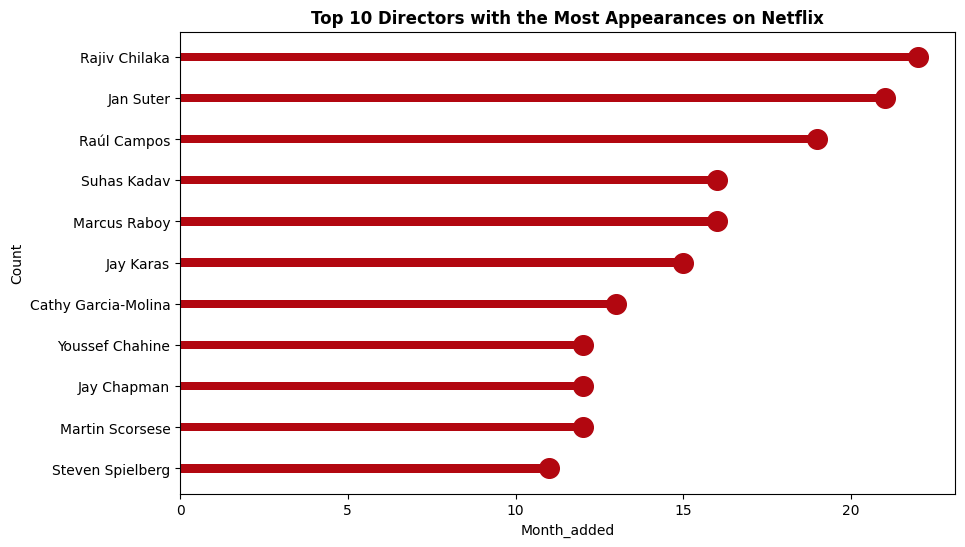

In [ ]:
plt.subplots(figsize = (10,6))
plt.barh(y = d_cnt['director'][::-1],width = d_cnt['title'][::-1],height = 0.2,color = '#b20710')
plt.scatter(y = d_cnt['director'][::-1], x = d_cnt['title'][::-1], s = 200 , color = '#b20710' )
plt.title("Top 10 Directors with the Most Appearances on Netflix",weight='bold')
plt.xlabel('Month_added')
plt.ylabel('Count')
plt.show()




Top 10 Actors who have appeared in most movies or TV shows.

In [ ]:
a_cnt = df1.groupby('cast')['title'].nunique().sort_values(ascending  = False)[0:11].reset_index()

a_cnt

,cast,title
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28


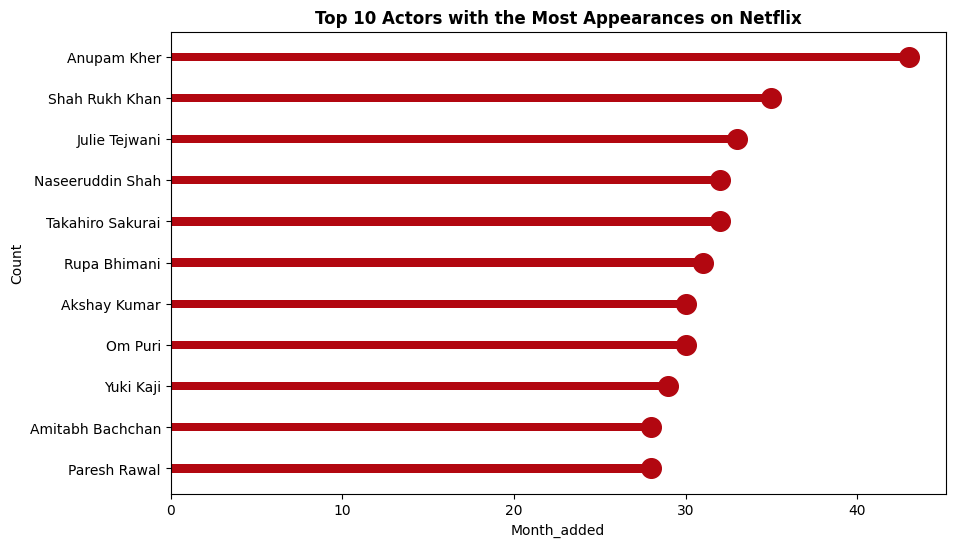

In [ ]:
plt.subplots(figsize = (10,6))
plt.barh(y = a_cnt['cast'][::-1],width = a_cnt['title'][::-1],height = 0.2,color = '#b20710')
plt.scatter(y = a_cnt['cast'][::-1], x = a_cnt['title'][::-1], s = 200 , color = '#b20710' )
plt.title("Top 10 Actors with the Most Appearances on Netflix",weight='bold')
plt.xlabel('Month_added')
plt.ylabel('Count')
plt.show()



#`Insights`
*Top 3 ranked directors are Rajiv Chilaka,Jan Suter,
Raúl Campos.

*Significantly, 8 out of the top 10 Actors with the highest number of appearances on Netflix are of Indian origin.

*Top 3 ranked actors are Anupam Kher,Shah Rukh Khan,Julie Tejwan.

### **Which genre movies are more popular or produced more?**


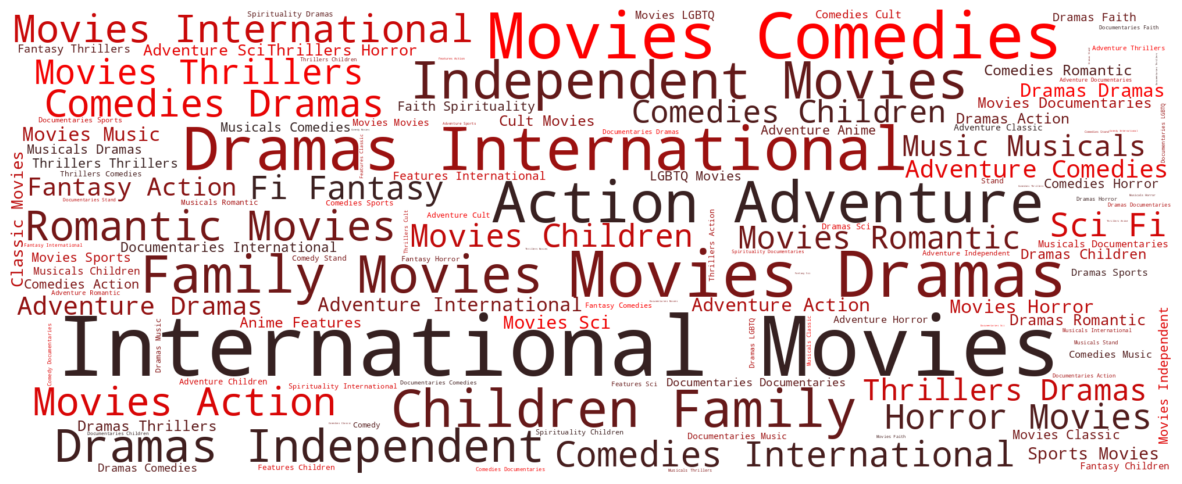

In [ ]:

movie_genre = df1[df1['type'] == 'Movie']
text = str(list(movie_genre['listed_in'])).replace(',','').replace("'",'').replace('"','').replace('[','').replace(']','')

color = sns.color_palette("dark:red", as_cmap=True)

wordcld = WordCloud(max_words = 150, width = 2000,  height = 800,background_color = 'white',colormap = color).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcld,interpolation = 'bilinear')
plt.axis('off')
plt.show()

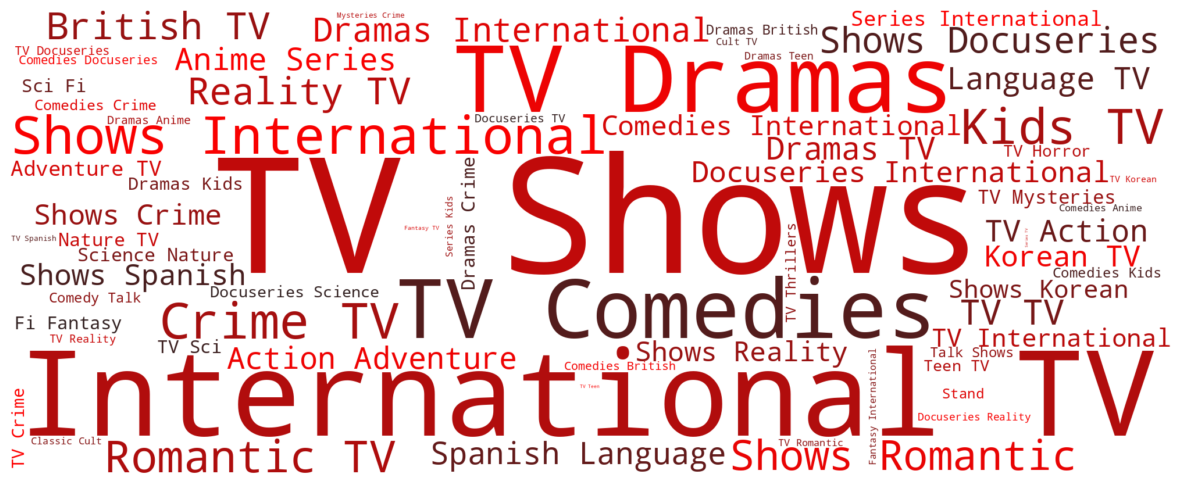

In [ ]:
tv_genre = df[df['type'] == 'TV Show']

text = str(list(tv_genre['listed_in'])).replace(',','').replace("'",'').replace('"','').replace('[','').replace(']','')

color = sns.color_palette("dark:red", as_cmap=True)

wordcld = WordCloud(max_words = 150, width = 2000,  height = 800,background_color = 'white',colormap = color).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcld,interpolation = 'bilinear')
plt.axis('off')
plt.show()

#`Insights`
*Popular Movie genres on Netflix include International Movies, Comedies, Dramas, Action, and Romantic films.

*Among TV Shows on Netflix, popular genres encompass Drama, Crime, Romance, Kids' content, Comedies, and International series.

### **Find After how many days the movie will be added to Netflix after the release of the movie.**


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [ ]:
#df['release_year'].dtype
print(df['year_added'].dtype)
print(df['release_year'].dtype)


datetime64[ns]
datetime64[ns]


In [ ]:
df['year_added'] = pd.to_datetime(df['year_added'], format='%Y')

In [ ]:
#Converting "release year" to datetime format
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df['Difference'] = (df['year_added'] - df['release_year']).dt.days
table =df.loc[:,["show_id","release_year","year_added","Difference"]]
table


,show_id,release_year,year_added,Difference
0,s1,1970-01-01 00:00:00.000002020,2021-01-01,18627.0
1,s2,1970-01-01 00:00:00.000002021,2021-01-01,18627.0
2,s3,1970-01-01 00:00:00.000002021,2021-01-01,18627.0
3,s4,1970-01-01 00:00:00.000002021,2021-01-01,18627.0
4,s5,1970-01-01 00:00:00.000002021,2021-01-01,18627.0
...,...,...,...,...
8802,s8803,1970-01-01 00:00:00.000002007,2019-01-01,17896.0
8803,s8804,1970-01-01 00:00:00.000002018,2019-01-01,17896.0
8804,s8805,1970-01-01 00:00:00.000002009,2019-01-01,17896.0
8805,s8806,1970-01-01 00:00:00.000002006,2020-01-01,18261.0


In [ ]:
table.Difference.mode()[0]

17896.0

#`Insights`
Tried solving difference of years by converting release year to datetime formate, but since values start from zero i dont find difference in 18000 makes any sense. Hence I have grouped countries and found difference of years for easy evaluation.

In [ ]:
#creating df for top 10 movies producing countries
df_movie = df1[df1['type'] == 'Movie']
df_movie = df_movie.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_movie = df_movie.drop(3)

#creating df with top 10 movie producing countries and average difference between release year and added year
movie_year = df1[(df1['type'] == 'Movie') & (df1['country'].isin(df_movie['country']))]

#adding the difference column
movie_year['diff'] = movie_year['year_added'] - movie_year['release_year']

#calculating the average diff
movie_year = movie_year.groupby('country')['diff'].mean().round().reset_index().sort_values(by = 'diff',ascending = False)

#converting to int
movie_year['diff'] = movie_year['diff'].astype('int')

movie_year


<ipython-input-106-968ca37ffcef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_year['diff'] = movie_year['year_added'] - movie_year['release_year']


,country,diff
1,Egypt,14
4,India,8
8,United Kingdom,8
9,United States,8
3,Germany,7
2,France,6
5,Japan,6
6,Mexico,5
0,China,4
7,Spain,2


In [ ]:
#Calculating Mode of difference in years
movie_year['diff'].mode()[0]

8

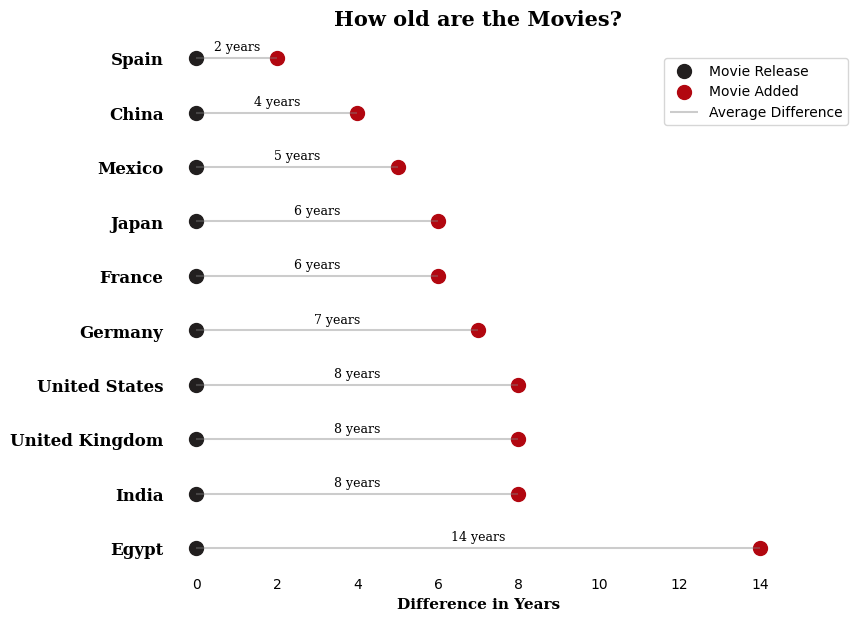

In [ ]:
#creating y-axis co-ordinates
yrange = range(1,len(movie_year)+1)
xrange = [0 for i in range(10)]

#setting the plot style
fig, ax = plt.subplots(figsize=(8, 7))


#plotting the scatter points
ax.scatter(xrange,yrange,color = '#221f1f',s=100,label = 'Movie Release')
ax.scatter(movie_year['diff'],yrange,color = '#b20710',s=100,label = 'Movie Added')

#plotting the horizontal lines between the points
ax.hlines(yrange,xmin = 0,xmax = movie_year['diff'],color = 'grey',alpha = 0.4,label = 'Average Difference')

#adding avg. difference values on lines
for i in range(10):
    ax.text(movie_year['diff'].iloc[i]/2,yrange[i]+0.2,f"{movie_year['diff'].iloc[i]} years",
            {'font':'serif', 'size':9,'fontweight':'light'},ha = 'center',va = 'center')

#removing the axislines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#removing tick marks but keeping the labels
ax.tick_params(axis = 'both',length = 0)

#customizing the y-axis labels
ax.set_yticks(yrange,movie_year['country'],fontsize= 12,fontfamily='serif',fontweight = 'bold')

#adding xlabel
ax.set_xlabel('Difference in Years',fontfamily='serif',fontsize = 11,fontweight = 'bold')

#Adding title to the graph
ax.set_title('How old are the Movies?',{'font':'serif', 'size':15,'weight':'bold'})

#adding legend
plt.legend(loc = (0.8,0.83))


plt.show()

#`Insights`

*Mode for the difference is 8 years, depicting lag between release and movie date added to netflix is 8 years.

*Egypt country stays behind in adding movies on netflix i.e. 14years.

*Whereas countries like Spain and China take 2 and 4 years in adding the movies which is relatively faster.


### **Business Insights Summary:**

**1.Quantity of Content:** Netflix predominantly offers more films than TV shows, aligning with expectations given films' broader appeal.

**2.Content Addition Strategy:** Netflix strategically adds the most content in July and December, likely timed for seasonal viewing peaks.

**3.Genre Correlations:** Positive correlations exist between TV dramas, international TV shows, romantic TV shows, independent films, and dramas, reflecting viewer preferences and content connections.

**4.Movie Length Trends:** Movie durations peaked around the 1960s and then stabilized around 100 minutes, indicating evolving trends in film lengths over time.

**5.TV Show Season Length:** Netflix's TV shows typically consist of a single season, suggesting a preference for shorter series among viewers.

**6.Common Themes:** Titles and descriptions frequently feature themes such as love, life, family, and adventure, highlighting recurring motifs in Netflix's content.

**7.Rating Distribution Insights:** Analyzing rating distributions over time offers valuable insights into changing audience preferences and content reception.

**8.Data-Driven Decision Making:** This analysis showcases the power of data in unraveling Netflix's content landscape, benefiting both viewers and creators.

**9.Understanding Streaming Patterns:** Staying abreast of streaming patterns and trends is essential for navigating Netflix's extensive content library effectively.

**10.Conclusion:** We hope this summary provides informative and enjoyable insights into Netflix's diverse content. Let data guide your streaming experience and explore the rich offerings on Netflix!

### **Business Recommendations**

**1.Emphasize TV Shows:** Netflix should prioritize TV shows given the audience preference for this format over films.

**2.Collaborate with Top Directors:** Engage top directors to develop more movies and TV shows, leveraging their reputation to boost content popularity.

**3.Support Emerging Directors:** Explore collaborations with directors who have fewer movies but high ratings, offering them opportunities to create compelling content for Netflix.

**4.Diversify Genre Focus:** Expand beyond international movie genres and prioritize genres like horror, comedy, and others to cater to diverse viewer interests.

**5.Expand TV Show Seasons:** Consider focusing on thriller genres to increase the number of seasons for TV shows and sustain viewer engagement.

**6.Strategic Release Dates:** Optimize OTT (over-the-top) platform releases during festival holidays, year-end, and weekends to maximize viewership and subscription benefits.

**7.Leverage Positive Reviews:** Directly release films with positive reviews to drive subscription growth and enhance customer satisfaction.

**8.Harness Popular Actor Fanbases:** Use popular actors' fan bases to promote TV shows or web series, especially in regions with limited film releases, to broaden Netflix's global reach.

**9.Create Localized Content:** Develop native TV shows tailored to local audiences to enhance engagement and appeal in specific regions.

These recommendations aim to enhance Netflix's content strategy, attract a wider audience, and strengthen the platform's competitive position in the streaming market.

### **Note: I have addressed only questions mentioned in the pdf named Netflix Data Exploration Business Case solution Approach**

In [ ]:
Note: I have addressed only questions mentioned in the pdf named Netflix Data Exploration Business Case solution Approach